# keras pygad XOR classification
* Document : https://blog.paperspace.com/train-keras-models-using-genetic-algorithm-with-pygad/
* Source : https://github.com/ahmedfgad/KerasGA

In [2]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad


In [14]:

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))



# Build the keras model using the functional API.


In [15]:

input_layer  = tensorflow.keras.layers.Input(2)
dense_layer = tensorflow.keras.layers.Dense(4, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(2, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)



# Create an instance of the pygad.kerasga.KerasGA class to build the initial population.


In [16]:
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)



# XOR problem inputs


In [17]:
data_inputs = numpy.array([[0.0, 0.0],
                           [0.0, 1.0],
                           [1.0, 0.0],
                           [1.0, 1.0]])


    
# XOR problem outputs


In [18]:
data_outputs = numpy.array([[1.0, 0.0],
                            [0.0, 1.0],
                            [0.0, 1.0],
                            [1.0, 0.0]])



# Prepare the PyGAD parameters. 
* Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class


In [19]:
num_generations = 150 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights.



# Create an instance of the pygad.GA class


In [20]:
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)



# Start the genetic algorithm evolution.


In [21]:
ga_instance.run()


1/1 [==============================] - 0s 18ms/step
Generation = 1
1/1 [==============================] - 0s 18ms/step
Fitness    = 1.6099483809700428
1/1 [==============================] - 0s 18ms/step
Generation = 2
1/1 [==============================] - 0s 18ms/step
Fitness    = 1.6480497549522026
1/1 [==============================] - 0s 23ms/step
Generation = 3
1/1 [==============================] - 0s 17ms/step
Fitness    = 1.6480497549522026
1/1 [==============================] - 0s 17ms/step
Generation = 4
1/1 [==============================] - 0s 18ms/step
Fitness    = 1.6480497549522026
1/1 [==============================] - 0s 18ms/step
Generation = 5
1/1 [==============================] - 0s 18ms/step
Fitness    = 1.6480497549522026
1/1 [==============================] - 0s 18ms/step
Generation = 6
1/1 [==============================] - 0s 19ms/step
Fitness    = 1.6501925648891131
1/1 [==============================] - 0s 19ms/step
Generation = 7
1/1 [======================


# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.


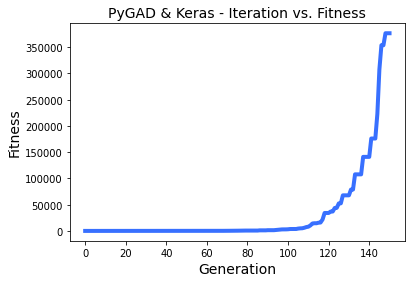

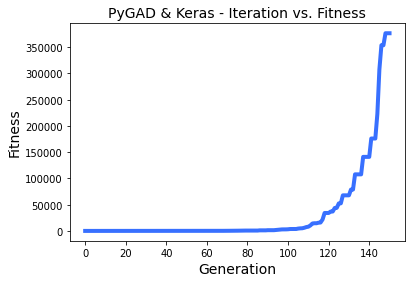

In [22]:
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)



# Returning the details of the best solution.


In [23]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
print("Predictions : \n", predictions)



1/1 [==============================] - 0s 19ms/step
Fitness value of the best solution = 376653.15730323107
Index of the best solution : 0
1/1 [==============================] - 0s 18ms/step
Predictions : 
 [[9.9999344e-01 6.5198055e-06]
 [2.7587907e-06 9.9999726e-01]
 [3.2041527e-07 9.9999964e-01]
 [9.9999857e-01 1.4684804e-06]]


# Calculate the binary crossentropy for the trained model.


In [24]:
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy : ", bce(data_outputs, predictions).numpy())



Binary Crossentropy :  2.6449625e-06


# Calculate the classification accuracy for the trained model.


In [25]:
ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

# model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

# _ = model.fit(x, y, verbose=0)
# r = model.predict(data_inputs)

Accuracy :  1.0
